In [1]:
%matplotlib inline
import tensorflow.keras as keras

In [3]:
import tensorflow as tf
print(tf.__version__)

1.13.1


In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train[0])


11493376/11490434 [==============================] - 9s 1us/step
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]

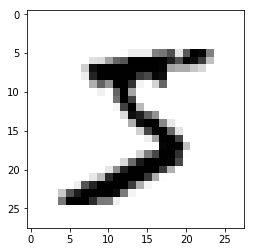

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [7]:
print(y_train[0])


5


[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.        

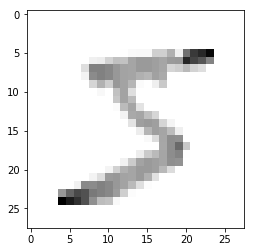

In [8]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
print(x_train[0])
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/3
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2673 - acc: 0.9229
Epoch 2/3
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1082 - acc: 0.9667
Epoch 3/3
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0753 - acc: 0.9764


In [10]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 25us/sample - loss: 0.0859 - acc: 0.9733
0.0858596971326
0.9733


In [11]:
predictions = model.predict(x_test)
print(predictions)

[[  2.22616912e-08   4.31142183e-07   1.49297528e-04 ...,   9.99707282e-01
    2.40689900e-07   1.10105145e-06]
 [  7.38568540e-10   8.86914902e-04   9.99106705e-01 ...,   8.80084838e-10
    9.75374661e-08   7.98928726e-14]
 [  5.40439302e-08   9.99405503e-01   3.06900074e-05 ...,   4.88730730e-04
    3.25863548e-05   1.41690202e-06]
 ..., 
 [  2.57323247e-08   1.29932161e-07   9.56285220e-08 ...,   1.68606057e-05
    8.16187548e-06   2.80468630e-05]
 [  1.00705313e-06   1.17671505e-07   4.80785811e-09 ...,   1.34669619e-07
    1.55674687e-04   9.60025304e-09]
 [  1.58761286e-05   3.75904222e-07   2.61345895e-06 ...,   9.26211330e-10
    9.26142093e-07   1.40097498e-07]]


In [12]:
import numpy as np
print(np.argmax((predictions[0])))

7


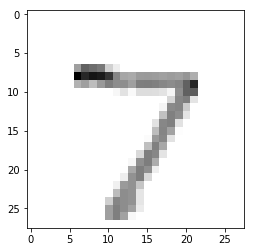

In [13]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

In [14]:
model.save('epic_num_reader.model')


In [16]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [20]:
predictions = new_model.predict(x_test)
print(np.argmax(predictions[0]))


7
